In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('cities_r2.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name_of_city                    493 non-null    object 
 1   state_code                      493 non-null    int64  
 2   state_name                      493 non-null    object 
 3   dist_code                       493 non-null    int64  
 4   population_total                493 non-null    int64  
 5   population_male                 493 non-null    int64  
 6   population_female               493 non-null    int64  
 7   0-6_population_total            493 non-null    int64  
 8   0-6_population_male             493 non-null    int64  
 9   0-6_population_female           493 non-null    int64  
 10  literates_total                 493 non-null    int64  
 11  literates_male                  493 non-null    int64  
 12  literates_female                493 

In [4]:
data.shape

(493, 22)

In [5]:
data.isnull().sum()

name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64

In [6]:
data.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [12]:
selected_col = data[['effective_literacy_rate_total']]

In [13]:
sc = StandardScaler()

In [14]:
scaled_col = sc.fit_transform(selected_col)

In [15]:
clusters = []
for i in range(1, 25):
  kmeans = KMeans(n_clusters= i, n_init = 10, random_state = 10)
  kmeans.fit(scaled_col)
  clusters.append(kmeans.inertia_)

In [16]:
clusters

[493.0000000000002,
 194.09785646249298,
 106.13437469098344,
 67.26695490379967,
 46.00677795226855,
 32.76995343998878,
 24.03690532153488,
 18.386521140624694,
 15.248047705397417,
 11.88174365540912,
 9.285863483135948,
 7.7050361497857525,
 6.315368456828736,
 5.388095879942893,
 4.521926573632756,
 3.9063981463999227,
 3.3567842476893324,
 3.03972697148939,
 2.6993464883803187,
 2.322958644425563,
 2.0940842773869206,
 1.8826505528978368,
 1.660356013755991,
 1.4645455547767603]

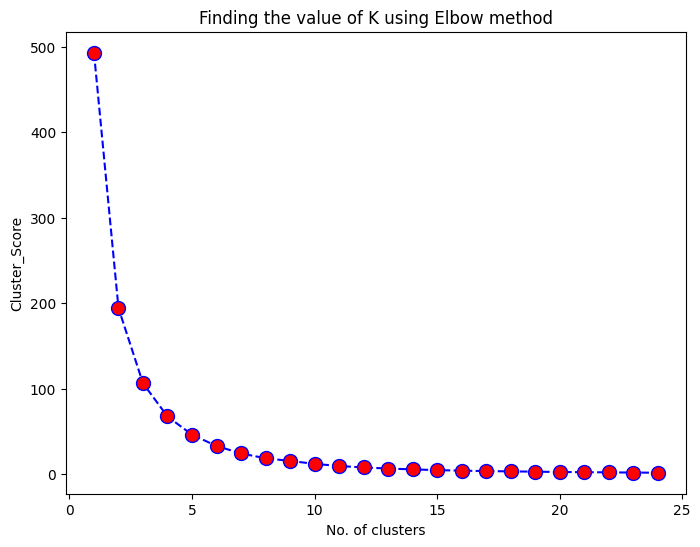

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 25), clusters, color='blue', linestyle='--', marker='o', markerfacecolor='red', markersize=10)
plt.title('Finding the value of K using Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('Cluster_Score')
plt.show()

In [21]:
# The elbow method is used to find the number of clusters in the data
# By visualization, we get the value of K is 4

In [22]:
kmeans = KMeans(n_clusters = 4, random_state=10)
kmeans.fit(scaled_col)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=10)

In [23]:
pred = kmeans.predict(scaled_col)

In [24]:
pred

array([3, 1, 3, 0, 2, 1, 2, 1, 1, 1, 0, 3, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 2, 1, 3, 3, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 3,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 3, 1, 2, 1, 3, 1, 0, 0, 0,
       0, 0, 0, 3, 1, 3, 1, 0, 1, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 1, 0, 1, 1, 0, 1, 3, 0, 3, 1, 0, 1, 0, 1, 2, 3, 0, 1,
       3, 0, 3, 1, 2, 0, 1, 3, 0, 1, 0, 1, 1, 2, 1, 0, 0, 3, 1, 1, 1, 3,
       3, 0, 3, 1, 3, 0, 3, 1, 0, 0, 1, 0, 0, 1, 0, 3, 2, 3, 1, 1, 0, 3,
       1, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 2, 3, 0, 0, 1, 0, 3, 3, 0,
       0, 0, 1, 0, 3, 0, 1, 0, 0, 1, 0, 3, 0, 3, 3, 3, 0, 1, 0, 1, 3, 1,
       3, 1, 3, 1, 3, 0, 0, 1, 0, 3, 1, 3, 3, 1, 3, 0, 1, 3, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 3, 3, 0, 0, 3, 0, 3,
       1, 3, 3, 3, 1, 1, 0, 0, 1, 0, 3, 1, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0,
       1, 0, 0, 2, 3, 3, 3, 1, 0, 1, 0, 1, 0, 0, 1, 1, 3, 1, 1, 3, 0, 0,
       0, 3, 0, 0, 0, 3, 1, 1, 1, 0, 1, 0, 0, 0, 2,

In [25]:
data['cluster'] = pred

In [26]:
data.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates,cluster
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675,3
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594,1
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768,3
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036,0
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031,2


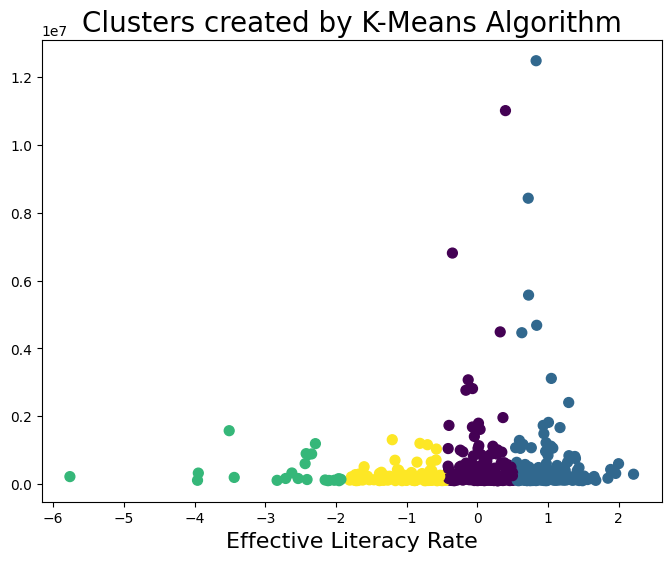

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(scaled_col, data['population_total'], c = data['cluster'], marker='o', s = 50)
plt.title('Clusters created by K-Means Algorithm', fontsize=20)
plt.xlabel('Effective Literacy Rate', fontsize=16)
plt.show()